11490434/11490434 [==============================] - 27s 2us/step
Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.1990 - val_loss: 0.1378
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1269 - val_loss: 0.1174
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1149 - val_loss: 0.1096
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1088 - val_loss: 0.1048
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1046 - val_loss: 0.1018
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1016 - val_loss: 0.0991
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0973 - val_loss: 0.0954
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0954 - val_loss: 0.0934
Epoch 10/10
313/313 [=============

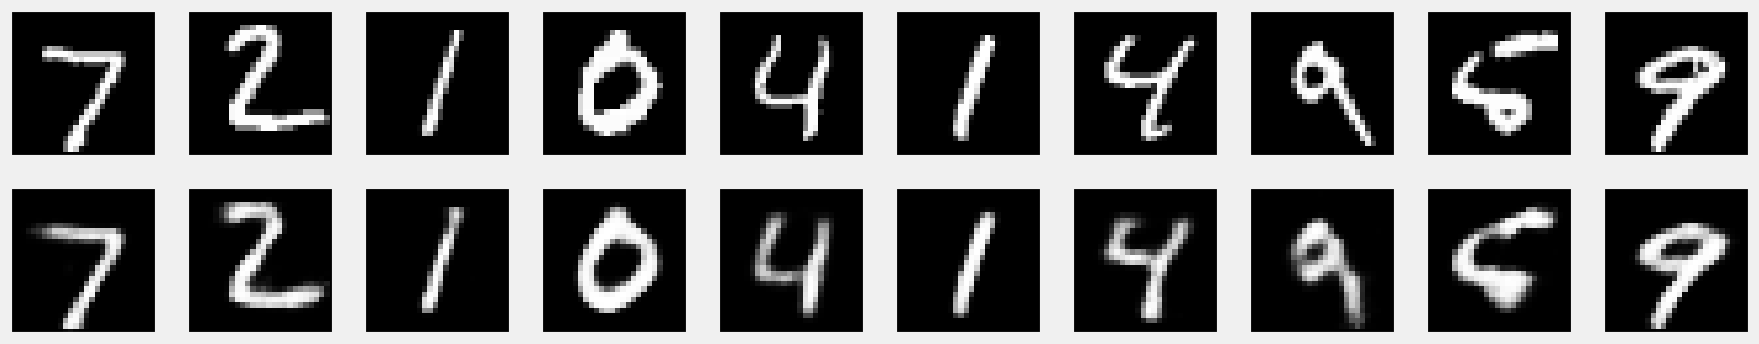

In [15]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense

# Load and preprocess MNIST data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Define input shape
input_shape = X_train.shape[1]

# Define encoder architecture
input_img = Input(shape=(input_shape,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

# Visualize some reconstructed images
decoded_imgs = autoencoder.predict(X_test)

import matplotlib.pyplot as plt

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# random noise

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.2133 - val_loss: 0.1547
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1432 - val_loss: 0.1320
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1290 - val_loss: 0.1229
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1215 - val_loss: 0.1172
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1162 - val_loss: 0.1125
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1123 - val_loss: 0.1099
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1095 - val_loss: 0.1074
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1072 - val_loss: 0.1055
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1055 - val_loss: 0.1036
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


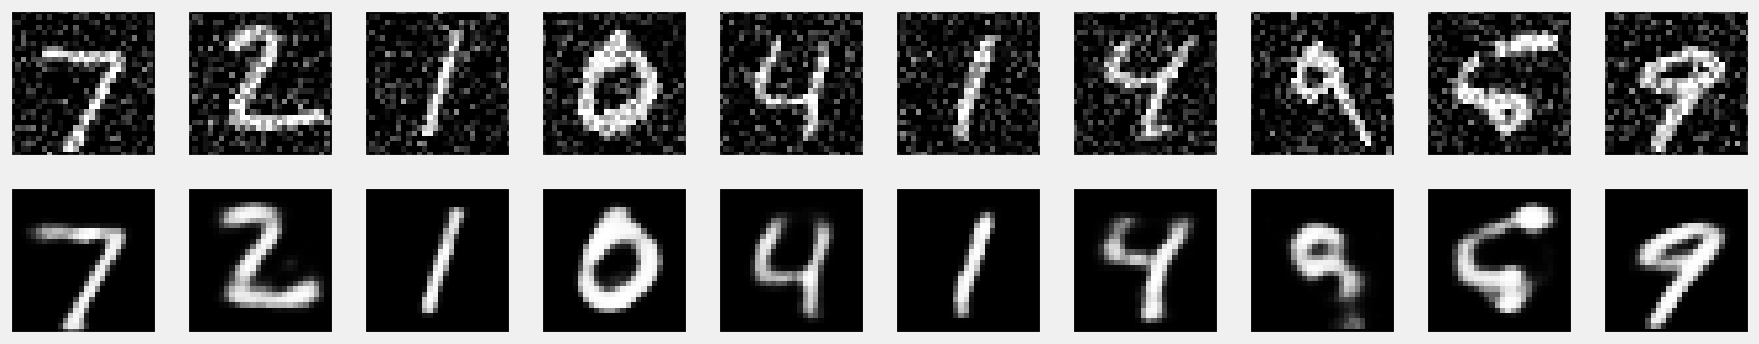

In [20]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Add random noise to the data
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.1, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.1, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.1)
X_test_noisy = np.clip(X_test_noisy, 0., 1.1)

# Define input shape
input_shape = X_train_noisy.shape[1]

# Define encoder architecture
input_img = Input(shape=(input_shape,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on noisy images
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test_noisy, X_test))

# Visualize some noisy input and reconstructed images
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Gaussian noise

Epoch 1/10
469/469 [==============================] - 6s 10ms/step - loss: 0.2129 - val_loss: 0.1521
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1422 - val_loss: 0.1318
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1279 - val_loss: 0.1216
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1201 - val_loss: 0.1157
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1152 - val_loss: 0.1119
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1114 - val_loss: 0.1085
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1086 - val_loss: 0.1063
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1066 - val_loss: 0.1047
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1050 - val_loss: 0.1035
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


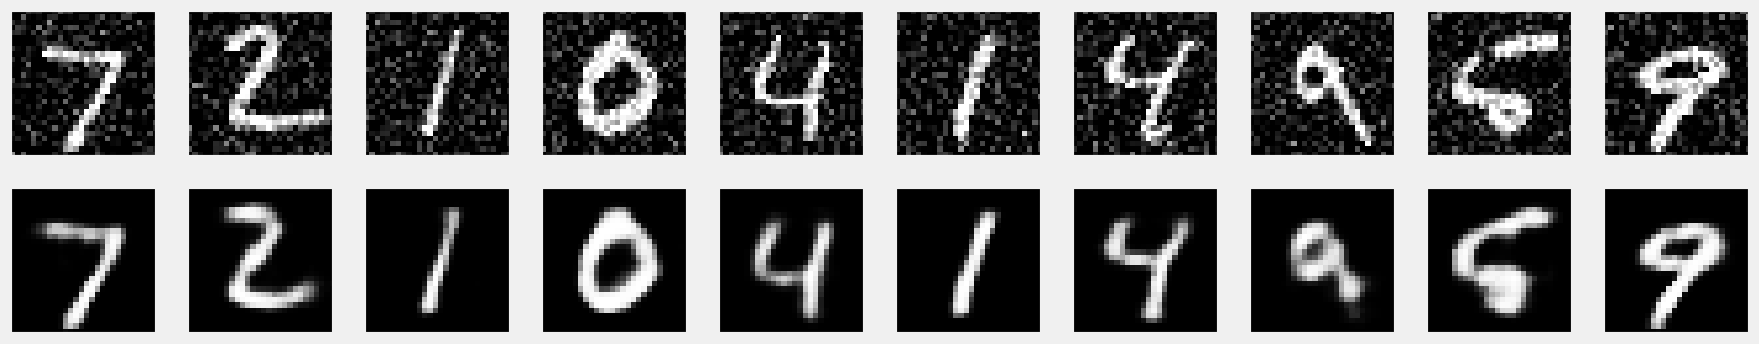

In [17]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Add Gaussian noise to the data
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Define input shape
input_shape = X_train_noisy.shape[1]

# Define encoder architecture
input_img = Input(shape=(input_shape,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on noisy images
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test_noisy, X_test))

# Visualize some noisy input and reconstructed images
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Droupout

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.2072 - val_loss: 0.1494
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1376 - val_loss: 0.1271
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1242 - val_loss: 0.1194
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1182 - val_loss: 0.1146
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1137 - val_loss: 0.1108
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1101 - val_loss: 0.1076
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1070 - val_loss: 0.1048
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1048 - val_loss: 0.1033
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1029 - val_loss: 0.1015
Epoch 10/10
313/313 [==============================] - 1s 4ms/step


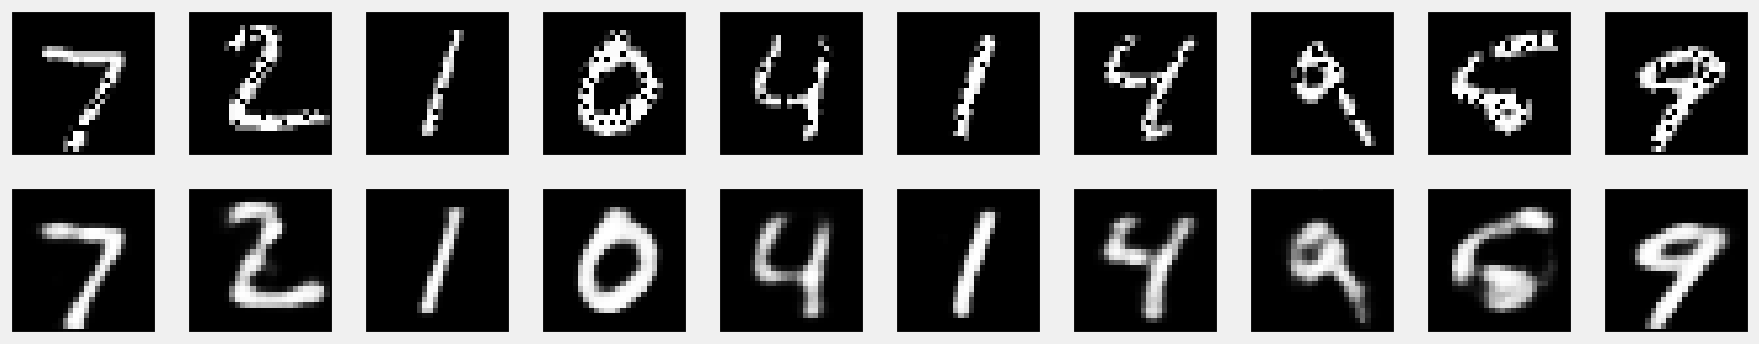

In [18]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Add dropout to the data
dropout_rate = 0.2
X_train_noisy = np.copy(X_train)
X_test_noisy = np.copy(X_test)

# Apply dropout to training and test data
for i in range(len(X_train_noisy)):
    mask = np.random.choice([0, 1], size=X_train_noisy[i].shape, p=[dropout_rate, 1 - dropout_rate])
    X_train_noisy[i] *= mask

for i in range(len(X_test_noisy)):
    mask = np.random.choice([0, 1], size=X_test_noisy[i].shape, p=[dropout_rate, 1 - dropout_rate])
    X_test_noisy[i] *= mask

# Define input shape
input_shape = X_train_noisy.shape[1]

# Define encoder architecture
input_img = Input(shape=(input_shape,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_shape, activation='sigmoid')(decoded)

# Create autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on noisy images
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test_noisy, X_test))

# Visualize some noisy input and reconstructed images
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
